#**EDA ANALYSIS**
---

#IMPORTING REQUIRED LIBRARIES

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#SETTING UP DATAFRAME

In [20]:
df0 = pd.read_csv("netflix_titles.csv")

In [48]:
countries = ["India", "United States", "Japan", "United Kingdom", "Italy", "France"]
df = df0[df0["country"].isin(countries)].copy()

In [49]:
df.drop(columns=['director','cast', 'description'], inplace=True)

#BASIC DATA ANALYSIS

In [50]:
df.shape

(4623, 9)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4623 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4623 non-null   object
 1   type          4623 non-null   object
 2   title         4623 non-null   object
 3   country       4623 non-null   object
 4   date_added    4615 non-null   object
 5   release_year  4623 non-null   int64 
 6   rating        4621 non-null   object
 7   duration      4620 non-null   object
 8   listed_in     4623 non-null   object
dtypes: int64(1), object(8)
memory usage: 361.2+ KB


HANDLING DUPLICATED DATA

In [52]:
df.nunique()

,0
show_id,4623
type,2
title,4623
country,6
date_added,1417
release_year,71
rating,17
duration,193
listed_in,425


In [53]:
df.duplicated().sum()

0

HANDLING MISSING DATA

In [59]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [60]:
df.replace(np.nan, "0", inplace=True)

In [61]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


HANDLING OUTLIERS

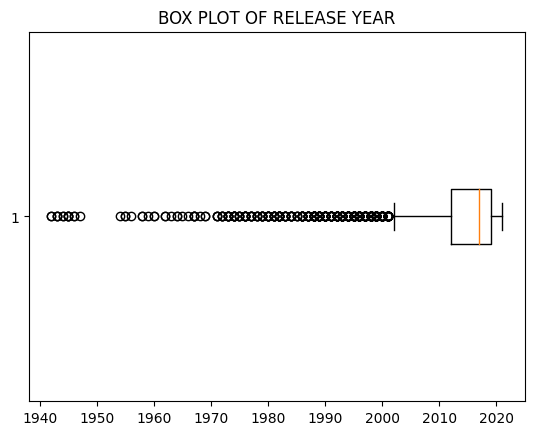

In [67]:
plt.boxplot(df['release_year'], vert=False)
plt.title('BOX PLOT OF RELEASE YEAR')
plt.show()

In [70]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(data < lower_bound) | (data > upper_bound)]
release_year_outliers = find_outliers_iqr(df['release_year'])
print(release_year_outliers.count())
# Convert 'release_year' column to numeric, handling errors
release_year_outliers.loc[:,'release_year'] = pd.to_numeric(release_year_outliers['release_year'], errors='coerce')

show_id         415
type            415
title           415
country         415
date_added      415
release_year    415
rating          415
duration        415
listed_in       415
dtype: int64


In [73]:
def drop_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # 25th percentile
    Q3 = data.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    return data[(data >= lower_bound) & (data <= upper_bound)]  # Filter data
# Drop outliers for Release Year
df.loc[:,'release_year'] = drop_outliers_iqr(df['release_year']).astype(int)

# Remove rows with NaN values generated from outlier removal
df = df.dropna(subset=['release_year'])

# Display the cleaned DataFrame
print("DataFrame after dropping outliers:")
df.info()


DataFrame after dropping outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 3994 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       3994 non-null   object 
 1   type          3994 non-null   object 
 2   title         3994 non-null   object 
 3   country       3994 non-null   object 
 4   date_added    3994 non-null   object 
 5   release_year  3994 non-null   float64
 6   rating        3994 non-null   object 
 7   duration      3994 non-null   object 
 8   listed_in     3994 non-null   object 
dtypes: float64(1), object(8)
memory usage: 312.0+ KB


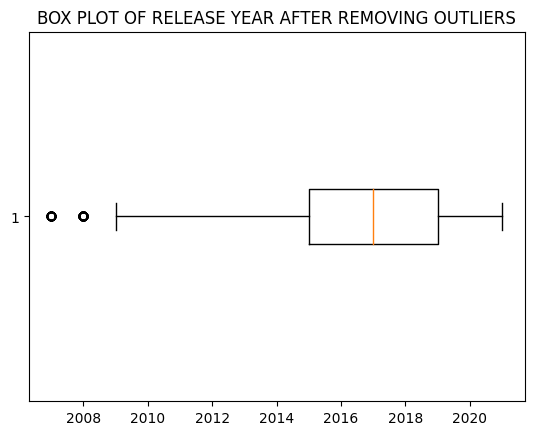

In [75]:
plt.boxplot(df['release_year'], vert=False)
plt.title('BOX PLOT OF RELEASE YEAR AFTER REMOVING OUTLIERS')
plt.show()

#UNIVARIATE ANALYSIS

**TYPE**

<Axes: >

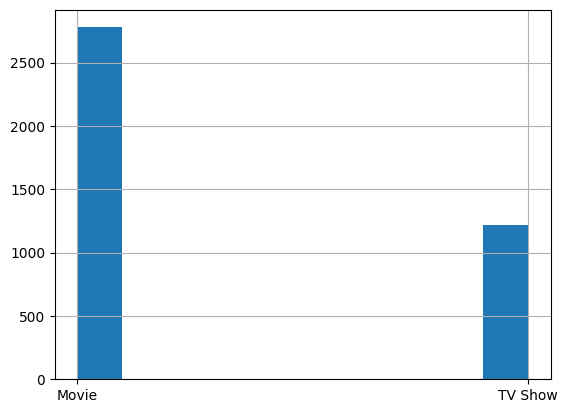

In [76]:
df["type"].hist()

*There are two types of content: movies and TV shows, of which movies are more in number in the given dataset.*

**COUNTRY**

<Axes: >

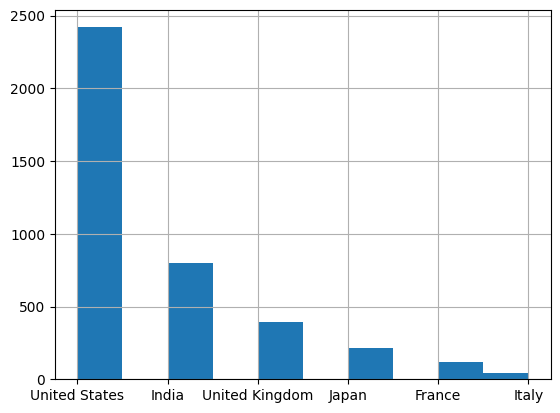

In [77]:
df["country"].hist()

*More number of movies were released in the United States than any other country in the dataset.*

**RELEASE YEAR**

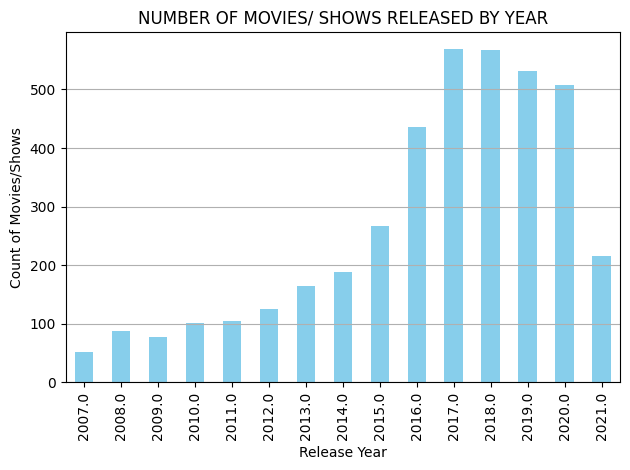

In [80]:
release_counts = df['release_year'].value_counts().sort_index()
release_counts.plot(kind='bar', color='skyblue')
plt.title('NUMBER OF MOVIES/ SHOWS RELEASED BY YEAR')
plt.xlabel('Release Year')
plt.ylabel('Count of Movies/Shows')
#plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')
plt.tight_layout()
plt.show()

*It shows the increase in demand for entertainment content.*

**RATING**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'TV-14'),
  Text(3, 0, 'TV-Y7'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-G'),
  Text(7, 0, 'R'),
  Text(8, 0, 'G'),
  Text(9, 0, 'PG'),
  Text(10, 0, '74 min'),
  Text(11, 0, '84 min'),
  Text(12, 0, '66 min'),
  Text(13, 0, 'NR'),
  Text(14, 0, 'TV-Y7-FV'),
  Text(15, 0, '0'),
  Text(16, 0, 'NC-17'),
  Text(17, 0, 'UR')])

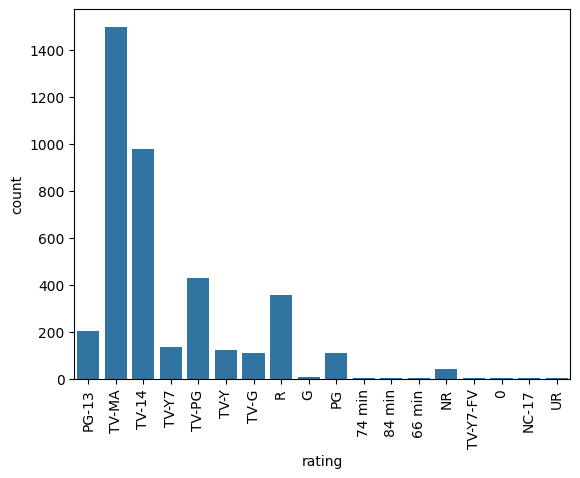

In [82]:
sns.countplot(x=df['rating'],orient='v')
plt.xticks(rotation=90)

*Out of the 18 types of ratings, the audience mostly prefers TV-MA & TV-14.*

**GENRES (LISTED_IN)**

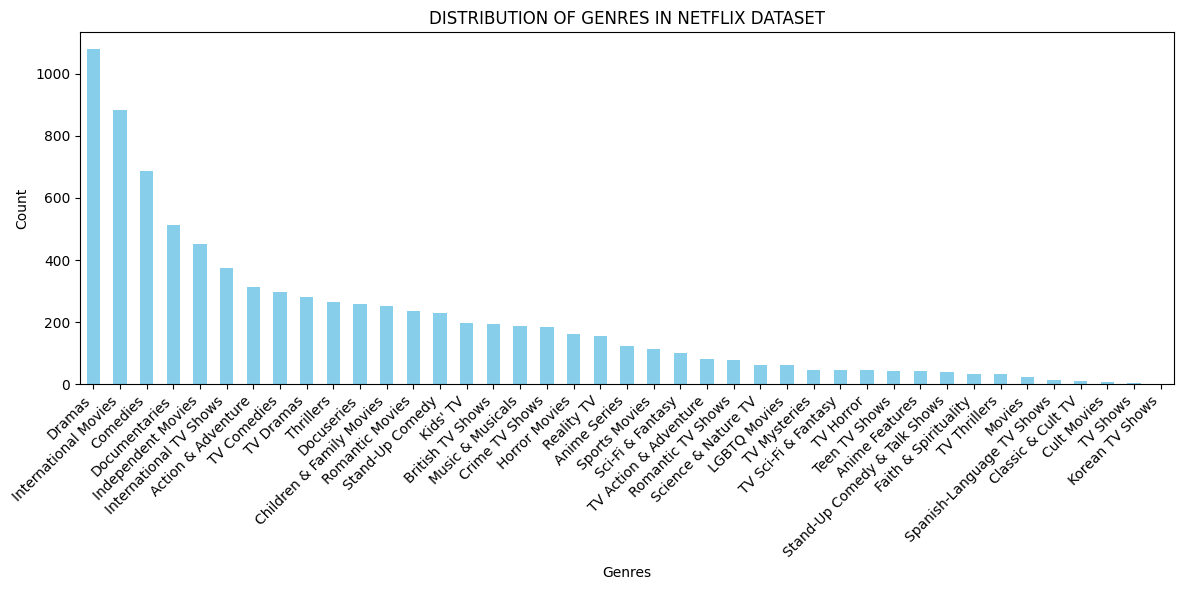

In [86]:
df['genres'] = df['listed_in'].str.split(', ')
genres_exploded = df.explode('genres')

genre_counts = genres_exploded['genres'].value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')

plt.title('DISTRIBUTION OF GENRES IN NETFLIX DATASET')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

*There is more demand for Dramas, International movies, Comedies among audience.*

In [89]:
new_genre = df['listed_in'].str.split(",",n=2)

df['Genre 1'] = new_genre.str.get(0)
df['Genre 2'] = new_genre.str.get(1)
df['Genre 3'] = new_genre.str.get(2)

In [96]:
df['Genre 1'].describe(include=all)

,Genre 1
count,3994
unique,33
top,Dramas
freq,718


In [95]:
df['Genre 2'].describe(include=all)

,Genre 2
count,2786
unique,36
top,International Movies
freq,509


In [97]:
df['Genre 3'].describe(include=all)

,Genre 3
count,1414
unique,30
top,International Movies
freq,335


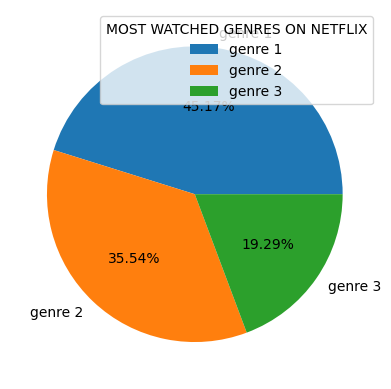

In [98]:
genre_types = ['genre 1','genre 2','genre 3']

Value_count = [5700,4485,2434]
plt.pie(Value_count, labels = genre_types, autopct="%2.2f%%")
plt.legend(title='MOST WATCHED GENRES ON NETFLIX')
plt.show()

**DATE ADDED**

In [103]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df['year_added'] = df["date_added"].dt.year
df['month_added'] = df["date_added"].dt.month

df['month_final'] = df['month_added'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df.month_final.value_counts().to_frame('VALUE COUNT')


,VALUE COUNT
month_final,
Mar,357
Dec,356
July,347
Oct,345
Nov,339
Aug,335
Sep,330
Apr,329
Jan,326


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Sep'),
  Text(1, 0, 'Aug'),
  Text(2, 0, 'July'),
  Text(3, 0, 'June'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Apr'),
  Text(6, 0, 'Mar'),
  Text(7, 0, 'Feb'),
  Text(8, 0, 'Jan'),
  Text(9, 0, 'Dec'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Oct')])

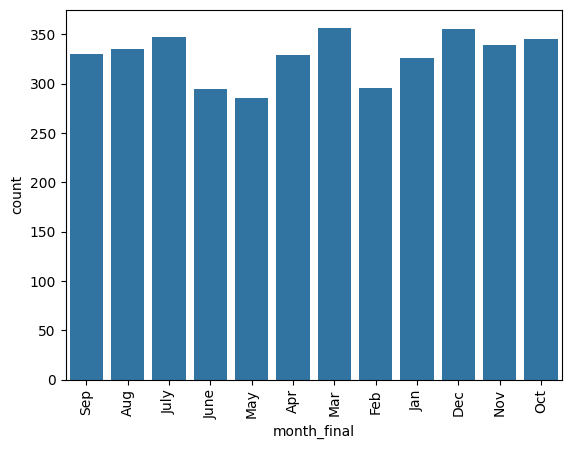

In [106]:
sns.countplot(x=df['month_final'],orient='v')
plt.xticks(rotation=90)

*Most number of content were released in March, and least in May.*

#BIVARIATE ANALYSIS

**TYPE vs DURATION**

In [111]:
df.duration.dropna()
df.duration.unique()

array(['90 min', '2 Seasons', '9 Seasons', '104 min', '4 Seasons',
       '103 min', '97 min', '3 Seasons', '1 Season', '6 Seasons',
       '102 min', '93 min', '96 min', '95 min', '85 min', '5 Seasons',
       '106 min', '92 min', '80 min', '128 min', '114 min', '115 min',
       '108 min', '88 min', '105 min', '120 min', '83 min', '112 min',
       '125 min', '127 min', '124 min', '136 min', '119 min', '133 min',
       '142 min', '113 min', '116 min', '145 min', '82 min', '110 min',
       '91 min', '94 min', '7 Seasons', '70 min', '98 min', '111 min',
       '135 min', '101 min', '118 min', '81 min', '143 min', '10 Seasons',
       '165 min', '64 min', '68 min', '117 min', '131 min', '122 min',
       '17 Seasons', '123 min', '89 min', '100 min', '87 min', '99 min',
       '86 min', '74 min', '109 min', '148 min', '140 min', '107 min',
       '121 min', '149 min', '33 min', '58 min', '76 min', '147 min',
       '162 min', '60 min', '65 min', '137 min', '75 min', '84 min',
       '3

*We can try converting duration in terms of number of seasons into minutes by assuming there are 10 episodes of 30 minutes each in each season.*

In [112]:
def convert_duration(row):
  if isinstance(row['duration'], str):

    if 'min' in row['duration']:
        return int(row['duration'].replace(' min', ''))       # Movie duration
    elif 'Seasons' in row['duration']:
        average_episode_duration = 30                         # Assuming average episode duration is 30 minutes
        num_seasons = int(row['duration'].split()[0])         # Get the number of seasons
        return num_seasons * 10 * average_episode_duration    # Assume 10 episodes per season
    else:
        return np.nan                                         # Handle any unexpected format
  else:
        return np.nan                                         # Return NaN if duration is not a string

df['numerical_duration'] = df.apply(convert_duration, axis=1)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0, 0.5, 'Duration (minutes)')

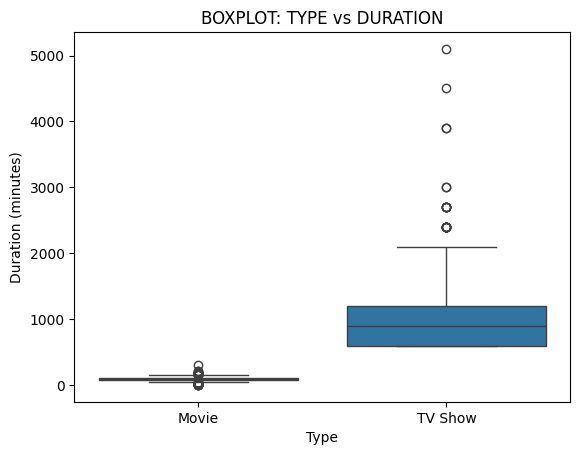

In [140]:
sns.boxplot(x='type', y='numerical_duration', data=df)

plt.title('BOXPLOT: TYPE vs DURATION')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')

*We can see that TV shows are more in duration than movies as expected.*

**TYPE vs COUNTRY**

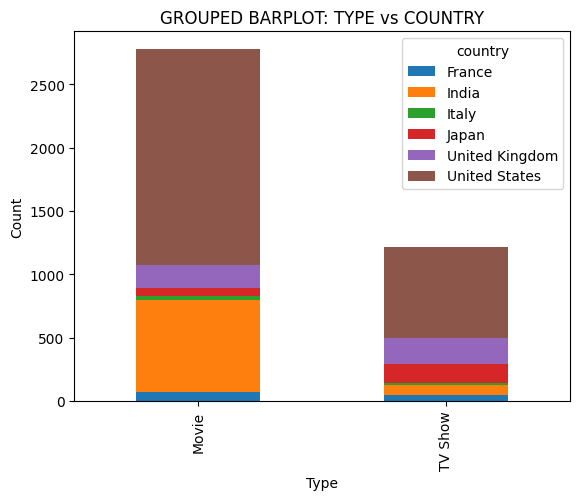

In [133]:
df.groupby(['type', 'country']).size().unstack().plot(kind='bar', stacked=True)

plt.title('GROUPED BARPLOT: TYPE vs COUNTRY')
plt.ylabel('Count')
plt.xlabel('Type')
plt.show()

*United States produces the most number of movies and TV shows.*

**TYPE vs RELEASE YEAR**

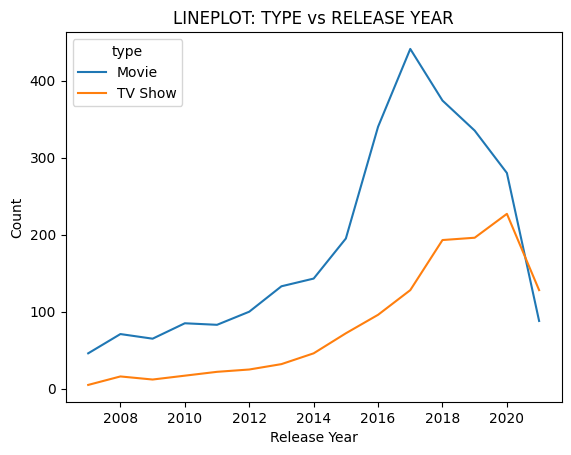

In [139]:
df.groupby(['release_year', 'type']).size().unstack().plot(kind='line')

plt.title('LINEPLOT: TYPE vs RELEASE YEAR')
plt.ylabel('Count')
plt.xlabel('Release Year')
plt.show()

*Maximam number of movies were produced in 2017 and maximum number of TV shows were produced in 2020.*

**DURATION vs RELEASE YEAR**

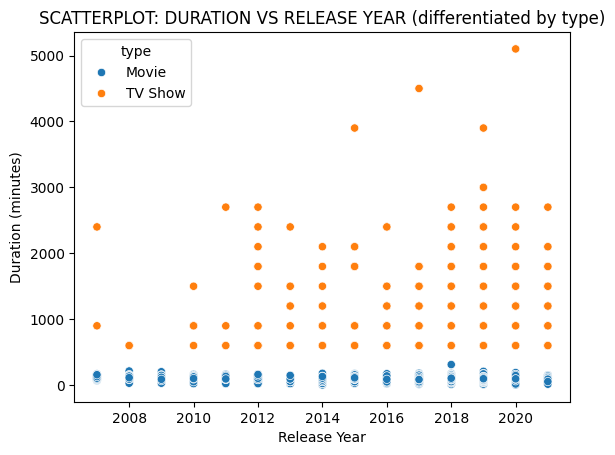

In [136]:
sns.scatterplot(x='release_year', y='numerical_duration', data=df, hue='type')

plt.title('SCATTERPLOT: DURATION VS RELEASE YEAR (differentiated by type)')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')

plt.show()

**COUNTRY vs RELEASE YEAR**

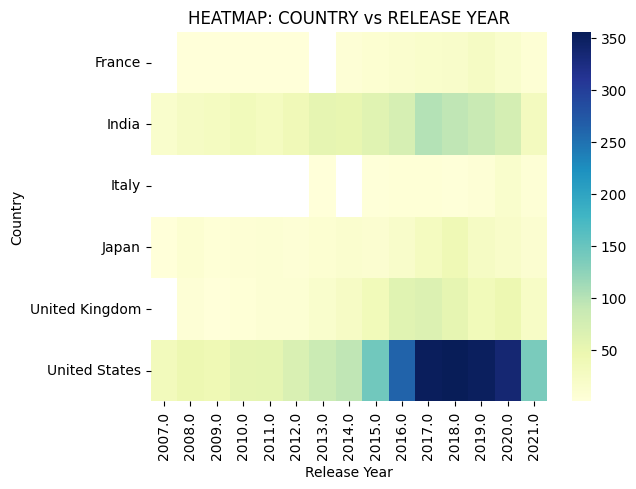

In [138]:
country_vs_release_year = df.groupby(['country', 'release_year']).size().unstack()

sns.heatmap(country_vs_release_year, cmap="YlGnBu", cbar=True)
plt.title('HEATMAP: COUNTRY vs RELEASE YEAR')
plt.ylabel('Country')
plt.xlabel('Release Year')
plt.show()

*United States produced the most amount of content in 2017-2019.*